In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('h1b_kaggle.csv')

In [3]:
#Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    #start_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    #end_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    #print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [4]:
df = reduce_mem_usage(df)
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.00000,2016.0,"ANN ARBOR, MICHIGAN",-83.7500,42.28125
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.00000,2016.0,"PLANO, TEXAS",-96.6875,33.03125
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.00000,2016.0,"JERSEY CITY, NEW JERSEY",-74.0625,40.71875
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.00000,2016.0,"DENVER, COLORADO",-105.0000,39.75000
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.40625,2016.0,"ST. LOUIS, MISSOURI",-90.1875,38.62500


# 2. Feature Engineering 

In [5]:
df.drop(['Unnamed: 0','lon','lat'],axis=1,inplace=True)
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.00000,2016.0,"ANN ARBOR, MICHIGAN"
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.00000,2016.0,"PLANO, TEXAS"
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.00000,2016.0,"JERSEY CITY, NEW JERSEY"
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.00000,2016.0,"DENVER, COLORADO"
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.40625,2016.0,"ST. LOUIS, MISSOURI"


<br><br><br><br>
# 1) Checking the acceptance ratio

In [6]:
# Calculating the acceptance ratio
def categorisation_visagrant(ratio_of_acceptance):
    if ratio_of_acceptance == -1:
        return "AR"     # no data
    elif ratio_of_acceptance >=0.0 and ratio_of_acceptance<0.20:
        return "VLA"     # very low acceptance
    elif ratio_of_acceptance>=0.20 and ratio_of_acceptance<0.40:
        return "LA"    # low acceptance
    elif ratio_of_acceptance>=0.40 and ratio_of_acceptance<0.60:
        return "MA"   # medium acceptance
    elif ratio_of_acceptance>=0.60 and ratio_of_acceptance<0.80:
        return "HA" # high acceptance
    elif ratio_of_acceptance>=0.80:
        return "VHA" # very high accpetance
    

In [7]:
#  calculation of acceptance ratio
df_1 = df.loc[:,['EMPLOYER_NAME', 'CASE_STATUS']]
df_1s = df.loc[:,['SOC_NAME', 'CASE_STATUS']]
df_1j = df.loc[:,['JOB_TITLE', 'CASE_STATUS']]

df_2_C = df_1[df_1.CASE_STATUS == 'CERTIFIED'].EMPLOYER_NAME
df_2_Cs = df_1s[df_1s.CASE_STATUS == 'CERTIFIED'].SOC_NAME
df_2_Cj = df_1j[df_1j.CASE_STATUS == 'CERTIFIED'].JOB_TITLE

positive_counts = df_2_C.value_counts()
positive_counts_s = df_2_Cs.value_counts()
positive_counts_j = df_2_Cj.value_counts()

total_counts = df_1.EMPLOYER_NAME.value_counts()
total_counts_s = df_1s.SOC_NAME.value_counts()
total_counts_j = df_1j.JOB_TITLE.value_counts()




final_ratio_series = positive_counts / total_counts
final_ratio_series_s = positive_counts_s / total_counts_s
final_ratio_series_j = positive_counts_j / total_counts_j

# intialising temp file
temp = pd.read_csv('h1b_kaggle.csv')

final_ratio_series.fillna(-1, inplace=True)
final_classification_employer = final_ratio_series.apply(categorisation_visagrant)
temp['EMPLOYER_ACCEPTANCE'] = temp.EMPLOYER_NAME.map(final_classification_employer)

final_ratio_series_s.fillna(-1, inplace=True)
final_classification_soc = final_ratio_series_s.apply(categorisation_visagrant)
temp['SOC_ACCEPTANCE'] = temp.SOC_NAME.map(final_classification_soc)

final_ratio_series_j.fillna(-1, inplace=True)
final_classification_job = final_ratio_series_j.apply(categorisation_visagrant)
temp['JOB_ACCEPTANCE'] = temp.JOB_TITLE.map(final_classification_job)




# print("Case Status ",temp.CASE_STATUS.nunique())
# print("Unique Employers ",temp.EMPLOYER_ACCEPTANCE.nunique())
# print("Wages Category", temp.WAGE_CATEGORY.nunique())
# print("Unique SOCs ", temp.SOC_ACCEPTANCE.nunique())
# print("Unique Job Titles ",temp.JOB_ACCEPTANCE.nunique())
# print("Unique Filing Year ",temp.YEAR.nunique())
# print("Unique Worksite State ",temp.STATE.nunique())
# print("Unique Employment Type ", temp.FULL_TIME_POSITION.nunique())


temp.head()


,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,EMPLOYER_ACCEPTANCE,SOC_ACCEPTANCE,JOB_ACCEPTANCE
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826,HA,HA,HA
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843,HA,VHA,HA
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158,HA,VHA,HA
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236,AR,VHA,MA
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003,HA,VHA,MA


In [8]:
# one hot coding the ratios so we could find out which company has highest ratio
temp = pd.get_dummies(temp, columns=['EMPLOYER_ACCEPTANCE','JOB_ACCEPTANCE', 'SOC_ACCEPTANCE' ], drop_first=True)
temp.drop(['FULL_TIME_POSITION','CASE_STATUS','YEAR','WORKSITE','PREVAILING_WAGE','lon','lat','Unnamed: 0'],axis=1,inplace=True)
temp.head()

,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,EMPLOYER_ACCEPTANCE_HA,EMPLOYER_ACCEPTANCE_LA,EMPLOYER_ACCEPTANCE_MA,EMPLOYER_ACCEPTANCE_VHA,EMPLOYER_ACCEPTANCE_VLA,JOB_ACCEPTANCE_HA,JOB_ACCEPTANCE_LA,JOB_ACCEPTANCE_MA,JOB_ACCEPTANCE_VHA,JOB_ACCEPTANCE_VLA,SOC_ACCEPTANCE_HA,SOC_ACCEPTANCE_LA,SOC_ACCEPTANCE_MA,SOC_ACCEPTANCE_VHA,SOC_ACCEPTANCE_VLA
0,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [9]:
for i in range(5):
    print(i)

0
1
2
3
4


In [10]:
# For  finding the top 10 companies in each field

'''
# x1 = [temp_1_1,temp_1_2,temp_1_3,temp_1_4,temp_1_5]
# x11 = [temp__1_1,temp__1_2,temp__1_3,temp__1_4,temp__1_5]
# y1 = ['EMPLOYER_ACCEPTANCE_HA','EMPLOYER_ACCEPTANCE_LA','EMPLOYER_ACCEPTANCE_MA','EMPLOYER_ACCEPTANCE_VHA','EMPLOYER_ACCEPTANCE_VLA']
# z1 = ['top_10_EMPLOYER_ACCEPTANCE_HA','top_10_EMPLOYER_ACCEPTANCE_LA','top_10_EMPLOYER_ACCEPTANCE_MA','top_10_EMPLOYER_ACCEPTANCE_VHA','top_10_EMPLOYER_ACCEPTANCE_VLA']

# def lol(a,a_,b,c):
#     a =  temp.loc[:,[b, c]]
#     a_ = a[a[c] == 1][b]

# for i in range(5):
#     lol(x1[i],x11[i],'EMPLOYER_NAME',y[i])
'''


# for creating temp matrixes
# for EMPLOYER_ACCEPTANCE
temp_1_1 = temp.loc[:,['EMPLOYER_NAME', 'EMPLOYER_ACCEPTANCE_HA']]
temp_1_2 = temp.loc[:,['EMPLOYER_NAME', 'EMPLOYER_ACCEPTANCE_LA']]
temp_1_3 = temp.loc[:,['EMPLOYER_NAME', 'EMPLOYER_ACCEPTANCE_MA']]
temp_1_4 = temp.loc[:,['EMPLOYER_NAME', 'EMPLOYER_ACCEPTANCE_VHA']]
temp_1_5 = temp.loc[:,['EMPLOYER_NAME', 'EMPLOYER_ACCEPTANCE_VLA']]
# for JOB_ACCEPTANCE
temp_2_1 = temp.loc[:,['JOB_TITLE', 'JOB_ACCEPTANCE_HA']]
temp_2_2 = temp.loc[:,['JOB_TITLE', 'JOB_ACCEPTANCE_LA']]
temp_2_3 = temp.loc[:,['JOB_TITLE', 'JOB_ACCEPTANCE_MA']]
temp_2_4 = temp.loc[:,['JOB_TITLE', 'JOB_ACCEPTANCE_VHA']]
temp_2_5 = temp.loc[:,['JOB_TITLE', 'JOB_ACCEPTANCE_VLA']]
# for SOC_ACCEPTANCE
temp_3_1 = temp.loc[:,['SOC_NAME', 'SOC_ACCEPTANCE_HA']]
temp_3_2 = temp.loc[:,['SOC_NAME', 'SOC_ACCEPTANCE_LA']]
temp_3_3 = temp.loc[:,['SOC_NAME', 'SOC_ACCEPTANCE_MA']]
temp_3_4 = temp.loc[:,['SOC_NAME', 'SOC_ACCEPTANCE_VHA']]
temp_3_5 = temp.loc[:,['SOC_NAME', 'SOC_ACCEPTANCE_VLA']]


# listing all the 
# for EMPLOYER_ACCEPTANCE
temp__1_1 = temp_1_1[temp_1_1.EMPLOYER_ACCEPTANCE_HA == 1].EMPLOYER_NAME
temp__1_2 = temp_1_2[temp_1_2.EMPLOYER_ACCEPTANCE_LA == 1].EMPLOYER_NAME
temp__1_3 = temp_1_3[temp_1_3.EMPLOYER_ACCEPTANCE_MA == 1].EMPLOYER_NAME
temp__1_4 = temp_1_4[temp_1_4.EMPLOYER_ACCEPTANCE_VHA == 1].EMPLOYER_NAME
temp__1_5 = temp_1_5[temp_1_5.EMPLOYER_ACCEPTANCE_VLA == 1].EMPLOYER_NAME
# for JOB_ACCEPTANCE
temp__2_1 = temp_2_1[temp_2_1.JOB_ACCEPTANCE_HA == 1].JOB_TITLE
temp__2_2 = temp_2_2[temp_2_2.JOB_ACCEPTANCE_LA == 1].JOB_TITLE
temp__2_3 = temp_2_3[temp_2_3.JOB_ACCEPTANCE_MA == 1].JOB_TITLE
temp__2_4 = temp_2_4[temp_2_4.JOB_ACCEPTANCE_VHA == 1].JOB_TITLE
temp__2_5 = temp_2_5[temp_2_5.JOB_ACCEPTANCE_VLA == 1].JOB_TITLE
# for SOC_ACCEPTANCE
temp__3_1 = temp_3_1[temp_3_1.SOC_ACCEPTANCE_HA == 1].SOC_NAME
temp__3_2 = temp_3_2[temp_3_2.SOC_ACCEPTANCE_LA == 1].SOC_NAME
temp__3_3 = temp_3_3[temp_3_3.SOC_ACCEPTANCE_MA == 1].SOC_NAME
temp__3_4 = temp_3_4[temp_3_4.SOC_ACCEPTANCE_VHA == 1].SOC_NAME
temp__3_5 = temp_3_5[temp_3_5.SOC_ACCEPTANCE_VLA == 1].SOC_NAME




# for getting top 10 companies in each ratio

top_10_EMPLOYER_ACCEPTANCE_HA =  temp__1_1.value_counts()[:10]
top_10_EMPLOYER_ACCEPTANCE_LA =  temp__1_2.value_counts()[:10]
top_10_EMPLOYER_ACCEPTANCE_MA =  temp__1_3.value_counts()[:10]
top_10_EMPLOYER_ACCEPTANCE_VHA =  temp__1_4.value_counts()[:10]
top_10_EMPLOYER_ACCEPTANCE_VLA =  temp__1_5.value_counts()[:10]

top_10_JOB_ACCEPTANCE_HA =  temp__2_1.value_counts()[:10]
top_10_JOB_ACCEPTANCE_LA =  temp__2_2.value_counts()[:10]
top_10_JOB_ACCEPTANCE_MA =  temp__2_3.value_counts()[:10]
top_10_JOB_ACCEPTANCE_VHA =  temp__2_4.value_counts()[:10]
top_10_JOB_ACCEPTANCE_VLA =  temp__2_5.value_counts()[:10]

top_10_SOC_ACCEPTANCE_HA =  temp__3_1.value_counts()[:10]
top_10_SOC_ACCEPTANCE_LA =  temp__3_2.value_counts()[:10]
top_10_SOC_ACCEPTANCE_MA =  temp__3_3.value_counts()[:10]
top_10_SOC_ACCEPTANCE_VHA =  temp__3_4.value_counts()[:10]
top_10_SOC_ACCEPTANCE_VLA =  temp__3_5.value_counts()[:10]

# print(y1[0])
print(top_10_EMPLOYER_ACCEPTANCE_HA)

GOOGLE INC.                           16473
IBM CORPORATION                       13276
QUALCOMM INCORPORATED                  3965
ERICSSON INC.                          3359
YAHOO! INC.                            3348
UNIVERSITY OF MICHIGAN                 2893
BROADCOM CORPORATION                   2862
HITACHI CONSULTING CORPORATION         2854
CREDIT SUISSE SECURITIES (USA) LLC     2546
NATIONAL INSTITUTES OF HEALTH, HHS     2327
Name: EMPLOYER_NAME, dtype: int64


# Creating a exel file while where we store top comapnies with acceptance ratio

In [11]:
lol = top_10_EMPLOYER_ACCEPTANCE_HA
lol = lol.to_frame()

lol.rename(columns={'EMPLOYER_NAME': 'top_10_EMPLOYER_ACCEPTANCE_HA'}, inplace=True)
print(lol)

lol = pd.concat([lol, top_10_EMPLOYER_ACCEPTANCE_LA], axis=1)
lol.rename(columns={'EMPLOYER_NAME': 'EMPLOYER_ACCEPTANCE_LA'}, inplace=True)
lol = pd.concat([lol, top_10_EMPLOYER_ACCEPTANCE_MA], axis=1)
lol.rename(columns={'EMPLOYER_NAME': 'top_10_EMPLOYER_ACCEPTANCE_MA'}, inplace=True)
lol = pd.concat([lol, top_10_EMPLOYER_ACCEPTANCE_VHA], axis=1)
lol.rename(columns={'EMPLOYER_NAME': 'top_10_EMPLOYER_ACCEPTANCE_VHA'}, inplace=True)
lol = pd.concat([lol, top_10_EMPLOYER_ACCEPTANCE_VLA], axis=1)
lol.rename(columns={'EMPLOYER_NAME': 'top_10_EMPLOYER_ACCEPTANCE_VLA'}, inplace=True)
print(lol)

lol = pd.concat([lol, top_10_JOB_ACCEPTANCE_HA], axis=1)
lol.rename(columns={'JOB_TITLE': 'top_10_JOB_ACCEPTANCE_HA'}, inplace=True)
lol = pd.concat([lol, top_10_JOB_ACCEPTANCE_LA], axis=1)
lol.rename(columns={'JOB_TITLE': 'top_10_JOB_ACCEPTANCE_LA'}, inplace=True)
lol = pd.concat([lol, top_10_JOB_ACCEPTANCE_MA], axis=1)
lol.rename(columns={'JOB_TITLE': 'top_10_JOB_ACCEPTANCE_MA'}, inplace=True)
lol = pd.concat([lol, top_10_JOB_ACCEPTANCE_VHA], axis=1)
lol.rename(columns={'JOB_TITLE': 'top_10_JOB_ACCEPTANCE_VHA'}, inplace=True)
lol = pd.concat([lol, top_10_JOB_ACCEPTANCE_VLA], axis=1)
lol.rename(columns={'JOB_TITLE': 'top_10_JOB_ACCEPTANCE_VLA'}, inplace=True)

lol = pd.concat([lol, top_10_SOC_ACCEPTANCE_HA], axis=1)
lol.rename(columns={'SOC_NAME': 'top_10_SOC_ACCEPTANCE_HA'}, inplace=True)
lol = pd.concat([lol, top_10_SOC_ACCEPTANCE_LA], axis=1)
lol.rename(columns={'SOC_NAME': 'top_10_SOC_ACCEPTANCE_LA'}, inplace=True)
lol = pd.concat([lol, top_10_SOC_ACCEPTANCE_MA], axis=1)
lol.rename(columns={'SOC_NAME': 'top_10_SOC_ACCEPTANCE_MA'}, inplace=True)
lol = pd.concat([lol, top_10_SOC_ACCEPTANCE_VHA], axis=1)
lol.rename(columns={'SOC_NAME': 'top_10_SOC_ACCEPTANCE_VHA'}, inplace=True)
lol = pd.concat([lol, top_10_SOC_ACCEPTANCE_VLA], axis=1)
lol.rename(columns={'SOC_NAME': 'top_10_SOC_ACCEPTANCE_VLA'}, inplace=True)


lol.head(10)

# lol.to_excel (r'D:\codes\college\pbl\trying\model\Top_10_companies_ratio.xlsx', index = True, header=True)



                                    top_10_EMPLOYER_ACCEPTANCE_HA
GOOGLE INC.                                                 16473
IBM CORPORATION                                             13276
QUALCOMM INCORPORATED                                        3965
ERICSSON INC.                                                3359
YAHOO! INC.                                                  3348
UNIVERSITY OF MICHIGAN                                       2893
BROADCOM CORPORATION                                         2862
HITACHI CONSULTING CORPORATION                               2854
CREDIT SUISSE SECURITIES (USA) LLC                           2546
NATIONAL INSTITUTES OF HEALTH, HHS                           2327
                                                 top_10_EMPLOYER_ACCEPTANCE_HA  \
GOOGLE INC.                                                            16473.0   
IBM CORPORATION                                                        13276.0   
QUALCOMM INCORPORATED       

,top_10_EMPLOYER_ACCEPTANCE_HA,EMPLOYER_ACCEPTANCE_LA,top_10_EMPLOYER_ACCEPTANCE_MA,top_10_EMPLOYER_ACCEPTANCE_VHA,top_10_EMPLOYER_ACCEPTANCE_VLA,top_10_JOB_ACCEPTANCE_HA,top_10_JOB_ACCEPTANCE_LA,top_10_JOB_ACCEPTANCE_MA,top_10_JOB_ACCEPTANCE_VHA,top_10_JOB_ACCEPTANCE_VLA,top_10_SOC_ACCEPTANCE_HA,top_10_SOC_ACCEPTANCE_LA,top_10_SOC_ACCEPTANCE_MA,top_10_SOC_ACCEPTANCE_VHA,top_10_SOC_ACCEPTANCE_VLA
GOOGLE INC.,16473.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IBM CORPORATION,13276.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QUALCOMM INCORPORATED,3965.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ERICSSON INC.,3359.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YAHOO! INC.,3348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UNIVERSITY OF MICHIGAN,2893.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BROADCOM CORPORATION,2862.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HITACHI CONSULTING CORPORATION,2854.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CREDIT SUISSE SECURITIES (USA) LLC,2546.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"NATIONAL INSTITUTES OF HEALTH, HHS",2327.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.head(20)

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.000000,2016.0,"ANN ARBOR, MICHIGAN"
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.000000,2016.0,"PLANO, TEXAS"
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.000000,2016.0,"JERSEY CITY, NEW JERSEY"
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.000000,2016.0,"DENVER, COLORADO"
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.406250,2016.0,"ST. LOUIS, MISSOURI"
5,CERTIFIED-WITHDRAWN,BURGER KING CORPORATION,CHIEF EXECUTIVES,"EXECUTIVE V P, GLOBAL DEVELOPMENT AND PRESIDEN...",Y,225000.000000,2016.0,"MIAMI, FLORIDA"
6,CERTIFIED-WITHDRAWN,BT AND MK ENERGY AND COMMODITIES,CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,91021.000000,2016.0,"HOUSTON, TEXAS"
7,CERTIFIED-WITHDRAWN,"GLOBO MOBILE TECHNOLOGIES, INC.",CHIEF EXECUTIVES,CHIEF OPERATIONS OFFICER,Y,150000.000000,2016.0,"SAN JOSE, CALIFORNIA"
8,CERTIFIED-WITHDRAWN,ESI COMPANIES INC.,CHIEF EXECUTIVES,PRESIDENT,Y,127546.000000,2016.0,"MEMPHIS, TEXAS"
9,WITHDRAWN,LESSARD INTERNATIONAL LLC,CHIEF EXECUTIVES,PRESIDENT,Y,154648.000000,2016.0,"VIENNA, VIRGINIA"


In [13]:
print(top_10_EMPLOYER_ACCEPTANCE_HA.keys())

Index(['GOOGLE INC.', 'IBM CORPORATION', 'QUALCOMM INCORPORATED',
       'ERICSSON INC.', 'YAHOO! INC.', 'UNIVERSITY OF MICHIGAN',
       'BROADCOM CORPORATION', 'HITACHI CONSULTING CORPORATION',
       'CREDIT SUISSE SECURITIES (USA) LLC',
       'NATIONAL INSTITUTES OF HEALTH, HHS'],
      dtype='object')


In [14]:
for i in top_10_EMPLOYER_ACCEPTANCE_HA.keys():
    print(i)

GOOGLE INC.
IBM CORPORATION
QUALCOMM INCORPORATED
ERICSSON INC.
YAHOO! INC.
UNIVERSITY OF MICHIGAN
BROADCOM CORPORATION
HITACHI CONSULTING CORPORATION
CREDIT SUISSE SECURITIES (USA) LLC
NATIONAL INSTITUTES OF HEALTH, HHS


In [15]:
df['EMPLOYER_ACCEPTANCE_HA']=np.where(df['EMPLOYER_NAME'].isin([keys for keys in top_10_EMPLOYER_ACCEPTANCE_HA.keys()]) ,1,0)
print(df['EMPLOYER_ACCEPTANCE_HA'].value_counts())

df[['EMPLOYER_NAME','EMPLOYER_ACCEPTANCE_HA']].head(30)

0    2948555
1      53903
Name: EMPLOYER_ACCEPTANCE_HA, dtype: int64


,EMPLOYER_NAME,EMPLOYER_ACCEPTANCE_HA
0,UNIVERSITY OF MICHIGAN,1
1,"GOODMAN NETWORKS, INC.",0
2,"PORTS AMERICA GROUP, INC.",0
3,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",0
4,PEABODY INVESTMENTS CORP.,0
5,BURGER KING CORPORATION,0
6,BT AND MK ENERGY AND COMMODITIES,0
7,"GLOBO MOBILE TECHNOLOGIES, INC.",0
8,ESI COMPANIES INC.,0
9,LESSARD INTERNATIONAL LLC,0


# Creating a new categories to mark company top 10  companied of each category based on thier acceptance ratio

In [16]:
df['EMPLOYER_ACCEPTANCE_HA']=np.where(df['EMPLOYER_NAME'].isin([keys for keys in top_10_EMPLOYER_ACCEPTANCE_HA.keys()]) ,1,0)
df['EMPLOYER_ACCEPTANCE_LA']=np.where(df['EMPLOYER_NAME'].isin([keys for keys in top_10_EMPLOYER_ACCEPTANCE_LA.keys()]) ,1,0)
df['EMPLOYER_ACCEPTANCE_MA']=np.where(df['EMPLOYER_NAME'].isin([keys for keys in top_10_EMPLOYER_ACCEPTANCE_MA.keys()]) ,1,0)
df['EMPLOYER_ACCEPTANCE_VHA']=np.where(df['EMPLOYER_NAME'].isin([keys for keys in top_10_EMPLOYER_ACCEPTANCE_VHA.keys()]) ,1,0)
df['EMPLOYER_ACCEPTANCE_VLA']=np.where(df['EMPLOYER_NAME'].isin([keys for keys in top_10_EMPLOYER_ACCEPTANCE_VLA.keys()]) ,1,0)

df['JOB_ACCEPTANCE_HA']=np.where(df['JOB_TITLE'].isin([keys for keys in top_10_JOB_ACCEPTANCE_HA.keys()]) ,1,0)
df['JOB_ACCEPTANCE_LA']=np.where(df['JOB_TITLE'].isin([keys for keys in top_10_JOB_ACCEPTANCE_LA.keys()]) ,1,0)
df['JOB_ACCEPTANCE_MA']=np.where(df['JOB_TITLE'].isin([keys for keys in top_10_JOB_ACCEPTANCE_MA.keys()]) ,1,0)
df['JOB_ACCEPTANCE_VHA']=np.where(df['JOB_TITLE'].isin([keys for keys in top_10_JOB_ACCEPTANCE_VHA.keys()]) ,1,0)
df['JOB_ACCEPTANCE_VLA']=np.where(df['JOB_TITLE'].isin([keys for keys in top_10_JOB_ACCEPTANCE_VLA.keys()]) ,1,0)

df['SOC_ACCEPTANCE_HA']=np.where(df['SOC_NAME'].isin([keys for keys in top_10_SOC_ACCEPTANCE_HA.keys()]) ,1,0)
df['SOC_ACCEPTANCE_LA']=np.where(df['SOC_NAME'].isin([keys for keys in top_10_SOC_ACCEPTANCE_LA.keys()]) ,1,0)
df['SOC_ACCEPTANCE_MA']=np.where(df['SOC_NAME'].isin([keys for keys in top_10_SOC_ACCEPTANCE_MA.keys()]) ,1,0)
df['SOC_ACCEPTANCE_VHA']=np.where(df['SOC_NAME'].isin([keys for keys in top_10_SOC_ACCEPTANCE_VHA.keys()]) ,1,0)
df['SOC_ACCEPTANCE_VLA']=np.where(df['SOC_NAME'].isin([keys for keys in top_10_SOC_ACCEPTANCE_VLA.keys()]) ,1,0)

In [17]:
print(df['EMPLOYER_ACCEPTANCE_HA'].value_counts())
df.dropna(axis=0, how="any",inplace=True)
df['EMPLOYER_ACCEPTANCE_HA']

0    2948555
1      53903
Name: EMPLOYER_ACCEPTANCE_HA, dtype: int64


0          1
1          0
2          0
3          0
4          0
          ..
3002440    0
3002441    0
3002442    0
3002443    0
3002444    0
Name: EMPLOYER_ACCEPTANCE_HA, Length: 2984609, dtype: int32

In [18]:
print(df['EMPLOYER_NAME'][df['EMPLOYER_ACCEPTANCE_HA'] == 1].nunique())
df['EMPLOYER_NAME'][df['EMPLOYER_ACCEPTANCE_HA'] == 1].unique()

10


array(['UNIVERSITY OF MICHIGAN', 'YAHOO! INC.', 'IBM CORPORATION',
       'GOOGLE INC.', 'BROADCOM CORPORATION',
       'CREDIT SUISSE SECURITIES (USA) LLC', 'ERICSSON INC.',
       'HITACHI CONSULTING CORPORATION', 'QUALCOMM INCORPORATED',
       'NATIONAL INSTITUTES OF HEALTH, HHS'], dtype=object)

# Label Encoding

In [19]:
def state_extractor(work_site):
    return work_site.split(', ')[1]
# or df['STATE'] = df['WORKSITE'].map(lambda x: x.split(', ')[1])


def wage_categorization(wage):
    if wage <=50000:
        return "VERY LOW"
    elif wage >50000 and wage <= 70000:
        return "LOW"
    elif wage >70000 and wage <= 90000:
        return "MEDIUM"
    elif wage >90000 and wage<=150000:
        return "HIGH"
    elif wage >=150000:
        return "VERY HIGH"

In [20]:
# WAGE
df['WAGE_CATEGORY'] = df['PREVAILING_WAGE'].apply(wage_categorization)
df = df.drop(['PREVAILING_WAGE'], axis = 1)
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,YEAR,WORKSITE,EMPLOYER_ACCEPTANCE_HA,EMPLOYER_ACCEPTANCE_LA,EMPLOYER_ACCEPTANCE_MA,...,JOB_ACCEPTANCE_LA,JOB_ACCEPTANCE_MA,JOB_ACCEPTANCE_VHA,JOB_ACCEPTANCE_VLA,SOC_ACCEPTANCE_HA,SOC_ACCEPTANCE_LA,SOC_ACCEPTANCE_MA,SOC_ACCEPTANCE_VHA,SOC_ACCEPTANCE_VLA,WAGE_CATEGORY
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,2016.0,"ANN ARBOR, MICHIGAN",1,0,0,...,0,0,0,0,1,0,0,0,0,VERY LOW
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,2016.0,"PLANO, TEXAS",0,0,0,...,0,0,0,0,0,0,0,0,0,VERY HIGH
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,2016.0,"JERSEY CITY, NEW JERSEY",0,0,0,...,0,0,0,0,0,0,0,0,0,VERY HIGH
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,2016.0,"DENVER, COLORADO",0,0,0,...,0,0,0,0,0,0,0,0,0,VERY HIGH
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,2016.0,"ST. LOUIS, MISSOURI",0,0,0,...,0,0,0,0,0,0,0,0,0,VERY HIGH


In [21]:
# State extractor
df['STATE'] = df['WORKSITE'].apply(state_extractor)
df = df.drop(['WORKSITE'],axis=1)
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,YEAR,EMPLOYER_ACCEPTANCE_HA,EMPLOYER_ACCEPTANCE_LA,EMPLOYER_ACCEPTANCE_MA,EMPLOYER_ACCEPTANCE_VHA,...,JOB_ACCEPTANCE_MA,JOB_ACCEPTANCE_VHA,JOB_ACCEPTANCE_VLA,SOC_ACCEPTANCE_HA,SOC_ACCEPTANCE_LA,SOC_ACCEPTANCE_MA,SOC_ACCEPTANCE_VHA,SOC_ACCEPTANCE_VLA,WAGE_CATEGORY,STATE
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,2016.0,1,0,0,0,...,0,0,0,1,0,0,0,0,VERY LOW,MICHIGAN
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,2016.0,0,0,0,0,...,0,0,0,0,0,0,0,0,VERY HIGH,TEXAS
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,2016.0,0,0,0,0,...,0,0,0,0,0,0,0,0,VERY HIGH,NEW JERSEY
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,2016.0,0,0,0,0,...,0,0,0,0,0,0,0,0,VERY HIGH,COLORADO
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,2016.0,0,0,0,0,...,0,0,0,0,0,0,0,0,VERY HIGH,MISSOURI


In [22]:
df.CASE_STATUS.value_counts()

CERTIFIED                                             2600241
CERTIFIED-WITHDRAWN                                    201479
DENIED                                                  93761
WITHDRAWN                                               89110
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

In [23]:
# CASE_STATUS AND FULL_TIME_POSITION
# We remove withdrawn and certified withdrawn as they happend due to human behaviour

df = df.drop(df[df['CASE_STATUS']=='CERTIFIED-WITHDRAWN'].index)
df = df.drop(df[df['CASE_STATUS']=='WITHDRAWN'].index)

df['CASE_STATUS'] = df['CASE_STATUS'].map({'CERTIFIED' : 1,'DENIED' : 0, 'REJECTED' : 0, 'INVALIDATED' : 0})
df['FULL_TIME_POSITION'] = df['FULL_TIME_POSITION'].map({'N' : 0, 'Y' : 1})
df.head(20)

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,YEAR,EMPLOYER_ACCEPTANCE_HA,EMPLOYER_ACCEPTANCE_LA,EMPLOYER_ACCEPTANCE_MA,EMPLOYER_ACCEPTANCE_VHA,...,JOB_ACCEPTANCE_MA,JOB_ACCEPTANCE_VHA,JOB_ACCEPTANCE_VLA,SOC_ACCEPTANCE_HA,SOC_ACCEPTANCE_LA,SOC_ACCEPTANCE_MA,SOC_ACCEPTANCE_VHA,SOC_ACCEPTANCE_VLA,WAGE_CATEGORY,STATE
18,1.0,QUICKLOGIX LLC,CHIEF EXECUTIVES,CEO,1,2016.0,0,0,0,0,...,0,0,0,0,0,0,0,0,VERY HIGH,CALIFORNIA
19,1.0,"MCCHRYSTAL GROUP, LLC",CHIEF EXECUTIVES,"PRESIDENT, NORTHEAST REGION",1,2016.0,0,0,0,0,...,0,0,0,0,0,0,0,0,VERY HIGH,VIRGINIA
22,1.0,"LOMICS, LLC",CHIEF EXECUTIVES,CEO,1,2016.0,0,0,0,0,...,0,0,0,0,0,0,0,0,HIGH,CALIFORNIA
23,1.0,UC UNIVERSITY HIGH SCHOOL EDUCATION INC.,CHIEF EXECUTIVES,CHIEF FINANCIAL OFFICER,1,2016.0,0,0,0,0,...,0,0,0,0,0,0,0,0,HIGH,CALIFORNIA
25,1.0,"QUICKLOGIX, INC.",CHIEF EXECUTIVES,CEO,1,2016.0,0,0,0,0,...,0,0,0,0,0,0,0,0,VERY HIGH,CALIFORNIA
27,1.0,HELLO INC.,CHIEF EXECUTIVES,CHIEF BUSINESS OFFICER,1,2016.0,0,0,0,0,...,0,0,0,0,0,0,0,0,VERY HIGH,CALIFORNIA
28,1.0,UMBEL CORP,CHIEF EXECUTIVES,VICE PRESIDENT OF ENGINEERING,1,2016.0,0,0,0,0,...,0,0,0,0,0,0,0,0,VERY HIGH,TEXAS
29,1.0,"PERSPECTIVES OF FREEDOM FOUNDATION, INC",CHIEF EXECUTIVES,EXECUTIVE DIRECTOR,1,2016.0,0,0,0,0,...,0,0,0,0,0,0,0,0,HIGH,FLORIDA
30,1.0,GTH INC.,CHIEF EXECUTIVES,"VICE PRESIDENT, BUSINESS DEVELOPMENT",1,2016.0,0,0,0,0,...,0,0,0,0,0,0,0,0,HIGH,DISTRICT OF COLUMBIA
31,1.0,THE KRAFT HEINZ COMPANY,CHIEF EXECUTIVES,HEAD OF US SALES,1,2016.0,0,0,0,0,...,0,0,0,0,0,0,0,0,VERY HIGH,ILLINOIS


<AxesSubplot:>

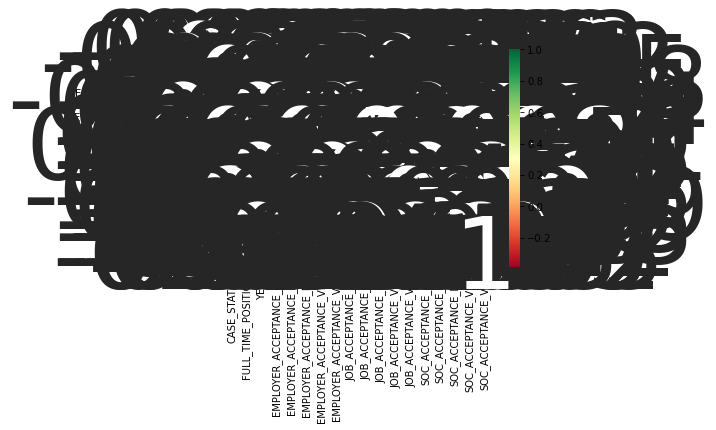

In [24]:
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":100})

<br><br><br><br><br><br><br><br>
# label encoding SOC_NAme then one hot encoding it 

In [25]:
df['SOC_NAME'].value_counts().sort_values(ascending=False).head(50)

Computer Systems Analysts                             271367
Computer Programmers                                  205973
SOFTWARE DEVELOPERS, APPLICATIONS                     197933
COMPUTER SYSTEMS ANALYSTS                             197925
Software Developers, Applications                     174191
COMPUTER PROGRAMMERS                                  154596
COMPUTER OCCUPATIONS, ALL OTHER                        99765
Computer Occupations, All Other                        64892
Software Developers, Systems Software                  40543
Management Analysts                                    35875
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE                  35262
Financial Analysts                                     30072
Accountants and Auditors                               29111
Computer Software Engineers, Applications              28160
MANAGEMENT ANALYSTS                                    26220
Computer Occupations, All Other*                       24360
Mechanical Engineers    

In [26]:
import sys
import warnings
warnings.filterwarnings("ignore")

df['JOB'] = 'others'
df['JOB'][df['SOC_NAME'].str.contains('COMPUTER','SOFTWARE')] = 'It'
df['JOB'][df['SOC_NAME'].str.contains('WEB','NETWORK')] = 'It'
df['JOB'][df['SOC_NAME'].str.contains('DEVELOPERS','SYSTEM')] = 'It'
df['JOB'][df['SOC_NAME'].str.contains('CHIEF','MANAGMENT')] = 'Manager'
df['JOB'][df['SOC_NAME'].str.contains('MECHANICAL','ELECTRICAL')] = 'Engineer'
df['JOB'][df['SOC_NAME'].str.contains('CIVIL','ENGINEER')] = 'Engineer'
df['JOB'][df['SOC_NAME'].str.contains('DESIGN','GRAPHIC')] = 'Artist'
df['JOB'][df['SOC_NAME'].str.contains('UI','UX')] = 'Artist'
df['JOB'][df['SOC_NAME'].str.contains('DRAW','ART')] = 'Artist'
df['JOB'][df['SOC_NAME'].str.contains('ACCOUNTANT')] = 'Finance'
df['JOB'][df['SOC_NAME'].str.contains('DATABASE')] = 'Database'
df['JOB'][df['SOC_NAME'].str.contains('SALES','MARKET')] = 'Scm'
df['JOB'][df['SOC_NAME'].str.contains('FINANCIAL','FINANCE')] = 'Finance'
df['JOB'][df['SOC_NAME'].str.contains('PUBLIC','FUNDRASING')] = 'Pr'
df['JOB'][df['SOC_NAME'].str.contains('EDUCAION','LAW')] = 'Administrative'
df['JOB'][df['SOC_NAME'].str.contains('AUDITORS','COMPILANCE')] = 'Audit'
df['JOB'][df['SOC_NAME'].str.contains('DISTRIBUTION','LOGISTIC')] = 'Scm'
df['JOB'][df['SOC_NAME'].str.contains('RECRUITS','HUMAN')] = 'Hr'
df['JOB'][df['SOC_NAME'].str.contains('AGRICULTURE','FARM')] = 'Agri'
df['JOB'][df['SOC_NAME'].str.contains('CONSTRUCTION','ARCHITECTURAL')] = 'Estate'
df['JOB'][df['SOC_NAME'].str.contains('THERAPIST','SURGEONS')] = 'Medical'
df['JOB'][df['SOC_NAME'].str.contains('BIO','CHEMISTS')] = 'Medical'
df['JOB'][df['SOC_NAME'].str.contains('MEDICAL')] = 'Medical'
df['JOB'][df['SOC_NAME'].str.contains('FORENSIC','HEALTH')] = 'Medical'
df['JOB'][df['SOC_NAME'].str.contains('TEACHER','STATISTICIANS')] = 'Education'

df.head(50)

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,YEAR,EMPLOYER_ACCEPTANCE_HA,EMPLOYER_ACCEPTANCE_LA,EMPLOYER_ACCEPTANCE_MA,EMPLOYER_ACCEPTANCE_VHA,...,JOB_ACCEPTANCE_VHA,JOB_ACCEPTANCE_VLA,SOC_ACCEPTANCE_HA,SOC_ACCEPTANCE_LA,SOC_ACCEPTANCE_MA,SOC_ACCEPTANCE_VHA,SOC_ACCEPTANCE_VLA,WAGE_CATEGORY,STATE,JOB
18,1.0,QUICKLOGIX LLC,CHIEF EXECUTIVES,CEO,1,2016.0,0,0,0,0,...,0,0,0,0,0,0,0,VERY HIGH,CALIFORNIA,Manager
19,1.0,"MCCHRYSTAL GROUP, LLC",CHIEF EXECUTIVES,"PRESIDENT, NORTHEAST REGION",1,2016.0,0,0,0,0,...,0,0,0,0,0,0,0,VERY HIGH,VIRGINIA,Manager
22,1.0,"LOMICS, LLC",CHIEF EXECUTIVES,CEO,1,2016.0,0,0,0,0,...,0,0,0,0,0,0,0,HIGH,CALIFORNIA,Manager
23,1.0,UC UNIVERSITY HIGH SCHOOL EDUCATION INC.,CHIEF EXECUTIVES,CHIEF FINANCIAL OFFICER,1,2016.0,0,0,0,0,...,0,0,0,0,0,0,0,HIGH,CALIFORNIA,Manager
25,1.0,"QUICKLOGIX, INC.",CHIEF EXECUTIVES,CEO,1,2016.0,0,0,0,0,...,0,0,0,0,0,0,0,VERY HIGH,CALIFORNIA,Manager
27,1.0,HELLO INC.,CHIEF EXECUTIVES,CHIEF BUSINESS OFFICER,1,2016.0,0,0,0,0,...,0,0,0,0,0,0,0,VERY HIGH,CALIFORNIA,Manager
28,1.0,UMBEL CORP,CHIEF EXECUTIVES,VICE PRESIDENT OF ENGINEERING,1,2016.0,0,0,0,0,...,0,0,0,0,0,0,0,VERY HIGH,TEXAS,Manager
29,1.0,"PERSPECTIVES OF FREEDOM FOUNDATION, INC",CHIEF EXECUTIVES,EXECUTIVE DIRECTOR,1,2016.0,0,0,0,0,...,0,0,0,0,0,0,0,HIGH,FLORIDA,Manager
30,1.0,GTH INC.,CHIEF EXECUTIVES,"VICE PRESIDENT, BUSINESS DEVELOPMENT",1,2016.0,0,0,0,0,...,0,0,0,0,0,0,0,HIGH,DISTRICT OF COLUMBIA,Manager
31,1.0,THE KRAFT HEINZ COMPANY,CHIEF EXECUTIVES,HEAD OF US SALES,1,2016.0,0,0,0,0,...,0,0,0,0,0,0,0,VERY HIGH,ILLINOIS,Manager


In [27]:
print(df['JOB'].unique())
print(df['JOB'].value_counts())

['Manager' 'others' 'Scm' 'Pr' 'It' 'Finance' 'Audit' 'Estate' 'Medical'
 'Artist' 'Database' 'Engineer' 'Education']
others       1757170
It            771950
Medical        33460
Education      24746
Engineer       23897
Finance        23795
Audit          20682
Database       15447
Artist         10172
Scm             7739
Pr              2723
Manager         1128
Estate          1111
Name: JOB, dtype: int64


<br><br><br><br><br><br>
# Applying one hot encoding

In [28]:
df = df.drop(['EMPLOYER_NAME', 'SOC_NAME','JOB_TITLE'], axis = 1)
df.columns

Index(['CASE_STATUS', 'FULL_TIME_POSITION', 'YEAR', 'EMPLOYER_ACCEPTANCE_HA',
       'EMPLOYER_ACCEPTANCE_LA', 'EMPLOYER_ACCEPTANCE_MA',
       'EMPLOYER_ACCEPTANCE_VHA', 'EMPLOYER_ACCEPTANCE_VLA',
       'JOB_ACCEPTANCE_HA', 'JOB_ACCEPTANCE_LA', 'JOB_ACCEPTANCE_MA',
       'JOB_ACCEPTANCE_VHA', 'JOB_ACCEPTANCE_VLA', 'SOC_ACCEPTANCE_HA',
       'SOC_ACCEPTANCE_LA', 'SOC_ACCEPTANCE_MA', 'SOC_ACCEPTANCE_VHA',
       'SOC_ACCEPTANCE_VLA', 'WAGE_CATEGORY', 'STATE', 'JOB'],
      dtype='object')

In [29]:
df.head()

,CASE_STATUS,FULL_TIME_POSITION,YEAR,EMPLOYER_ACCEPTANCE_HA,EMPLOYER_ACCEPTANCE_LA,EMPLOYER_ACCEPTANCE_MA,EMPLOYER_ACCEPTANCE_VHA,EMPLOYER_ACCEPTANCE_VLA,JOB_ACCEPTANCE_HA,JOB_ACCEPTANCE_LA,...,JOB_ACCEPTANCE_VHA,JOB_ACCEPTANCE_VLA,SOC_ACCEPTANCE_HA,SOC_ACCEPTANCE_LA,SOC_ACCEPTANCE_MA,SOC_ACCEPTANCE_VHA,SOC_ACCEPTANCE_VLA,WAGE_CATEGORY,STATE,JOB
18,1.0,1,2016.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,VERY HIGH,CALIFORNIA,Manager
19,1.0,1,2016.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,VERY HIGH,VIRGINIA,Manager
22,1.0,1,2016.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,HIGH,CALIFORNIA,Manager
23,1.0,1,2016.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,HIGH,CALIFORNIA,Manager
25,1.0,1,2016.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,VERY HIGH,CALIFORNIA,Manager


In [30]:
# not taking state coz we using different type of encoding on it 
# skipped coulmns coz of drop first  -  2011,VERY LOW,AR,AR,AR,agri
df = pd.get_dummies(df, columns=['YEAR','JOB','WAGE_CATEGORY' ], drop_first=True)
df.head()

,CASE_STATUS,FULL_TIME_POSITION,EMPLOYER_ACCEPTANCE_HA,EMPLOYER_ACCEPTANCE_LA,EMPLOYER_ACCEPTANCE_MA,EMPLOYER_ACCEPTANCE_VHA,EMPLOYER_ACCEPTANCE_VLA,JOB_ACCEPTANCE_HA,JOB_ACCEPTANCE_LA,JOB_ACCEPTANCE_MA,...,JOB_It,JOB_Manager,JOB_Medical,JOB_Pr,JOB_Scm,JOB_others,WAGE_CATEGORY_LOW,WAGE_CATEGORY_MEDIUM,WAGE_CATEGORY_VERY HIGH,WAGE_CATEGORY_VERY LOW
18,1.0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
19,1.0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
22,1.0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
23,1.0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
25,1.0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [31]:
df.columns

Index(['CASE_STATUS', 'FULL_TIME_POSITION', 'EMPLOYER_ACCEPTANCE_HA',
       'EMPLOYER_ACCEPTANCE_LA', 'EMPLOYER_ACCEPTANCE_MA',
       'EMPLOYER_ACCEPTANCE_VHA', 'EMPLOYER_ACCEPTANCE_VLA',
       'JOB_ACCEPTANCE_HA', 'JOB_ACCEPTANCE_LA', 'JOB_ACCEPTANCE_MA',
       'JOB_ACCEPTANCE_VHA', 'JOB_ACCEPTANCE_VLA', 'SOC_ACCEPTANCE_HA',
       'SOC_ACCEPTANCE_LA', 'SOC_ACCEPTANCE_MA', 'SOC_ACCEPTANCE_VHA',
       'SOC_ACCEPTANCE_VLA', 'STATE', 'YEAR_2012.0', 'YEAR_2013.0',
       'YEAR_2014.0', 'YEAR_2015.0', 'YEAR_2016.0', 'JOB_Audit',
       'JOB_Database', 'JOB_Education', 'JOB_Engineer', 'JOB_Estate',
       'JOB_Finance', 'JOB_It', 'JOB_Manager', 'JOB_Medical', 'JOB_Pr',
       'JOB_Scm', 'JOB_others', 'WAGE_CATEGORY_LOW', 'WAGE_CATEGORY_MEDIUM',
       'WAGE_CATEGORY_VERY HIGH', 'WAGE_CATEGORY_VERY LOW'],
      dtype='object')

In [32]:
print(df['STATE'].unique().shape)                            # 53 states are there in the station
print(df['STATE'].value_counts())
# therefore we only hot encode top 14 , those not in 14 will get all 0 
top_14 = [x for x in df.STATE.value_counts().sort_values(ascending=False).head(14).index]
top_14

(53,)
CALIFORNIA              497081
TEXAS                   262450
NEW YORK                261282
NEW JERSEY              194538
ILLINOIS                145385
MASSACHUSETTS           103289
PENNSYLVANIA            100382
FLORIDA                  96798
GEORGIA                  94016
WASHINGTON               91744
VIRGINIA                 80834
MICHIGAN                 74169
NORTH CAROLINA           72046
OHIO                     69731
MARYLAND                 49680
CONNECTICUT              45642
MINNESOTA                44648
ARIZONA                  37908
MISSOURI                 30901
WISCONSIN                29784
COLORADO                 27990
INDIANA                  26511
TENNESSEE                24574
OREGON                   21361
DISTRICT OF COLUMBIA     20347
DELAWARE                 16177
IOWA                     14774
ARKANSAS                 13579
KANSAS                   12349
UTAH                     11857
SOUTH CAROLINA           11620
KENTUCKY                 11608
RH

['CALIFORNIA',
 'TEXAS',
 'NEW YORK',
 'NEW JERSEY',
 'ILLINOIS',
 'MASSACHUSETTS',
 'PENNSYLVANIA',
 'FLORIDA',
 'GEORGIA',
 'WASHINGTON',
 'VIRGINIA',
 'MICHIGAN',
 'NORTH CAROLINA',
 'OHIO']

In [33]:
# now to hot encode state   
for label in top_14:
    df[label] = np.where(df['STATE']==label,1,0)

temp = df[['STATE']+top_14]
# temp.shape   (2707682, 29)
# df.shape  (2707682, 46)

In [34]:
df = pd.concat([df, temp.iloc[:,1:]], axis=1)
df = df.drop(['STATE'], axis=1)
df.head(12)

,CASE_STATUS,FULL_TIME_POSITION,EMPLOYER_ACCEPTANCE_HA,EMPLOYER_ACCEPTANCE_LA,EMPLOYER_ACCEPTANCE_MA,EMPLOYER_ACCEPTANCE_VHA,EMPLOYER_ACCEPTANCE_VLA,JOB_ACCEPTANCE_HA,JOB_ACCEPTANCE_LA,JOB_ACCEPTANCE_MA,...,ILLINOIS,MASSACHUSETTS,PENNSYLVANIA,FLORIDA,GEORGIA,WASHINGTON,VIRGINIA,MICHIGAN,NORTH CAROLINA,OHIO
18,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
22,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
30,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,1.0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [35]:
df.columns

Index(['CASE_STATUS', 'FULL_TIME_POSITION', 'EMPLOYER_ACCEPTANCE_HA',
       'EMPLOYER_ACCEPTANCE_LA', 'EMPLOYER_ACCEPTANCE_MA',
       'EMPLOYER_ACCEPTANCE_VHA', 'EMPLOYER_ACCEPTANCE_VLA',
       'JOB_ACCEPTANCE_HA', 'JOB_ACCEPTANCE_LA', 'JOB_ACCEPTANCE_MA',
       'JOB_ACCEPTANCE_VHA', 'JOB_ACCEPTANCE_VLA', 'SOC_ACCEPTANCE_HA',
       'SOC_ACCEPTANCE_LA', 'SOC_ACCEPTANCE_MA', 'SOC_ACCEPTANCE_VHA',
       'SOC_ACCEPTANCE_VLA', 'YEAR_2012.0', 'YEAR_2013.0', 'YEAR_2014.0',
       'YEAR_2015.0', 'YEAR_2016.0', 'JOB_Audit', 'JOB_Database',
       'JOB_Education', 'JOB_Engineer', 'JOB_Estate', 'JOB_Finance', 'JOB_It',
       'JOB_Manager', 'JOB_Medical', 'JOB_Pr', 'JOB_Scm', 'JOB_others',
       'WAGE_CATEGORY_LOW', 'WAGE_CATEGORY_MEDIUM', 'WAGE_CATEGORY_VERY HIGH',
       'WAGE_CATEGORY_VERY LOW', 'CALIFORNIA', 'TEXAS', 'NEW YORK',
       'NEW JERSEY', 'ILLINOIS', 'MASSACHUSETTS', 'PENNSYLVANIA', 'FLORIDA',
       'GEORGIA', 'WASHINGTON', 'VIRGINIA', 'MICHIGAN', 'NORTH CAROLINA',
       '

## Splitting the data into train test split

In [36]:
x = df.drop(['CASE_STATUS'], axis=1) # Independent variables
y = df['CASE_STATUS'] # Dependent variables

In [37]:
print(x.columns.shape)
x.columns

(65,)


Index(['FULL_TIME_POSITION', 'EMPLOYER_ACCEPTANCE_HA',
       'EMPLOYER_ACCEPTANCE_LA', 'EMPLOYER_ACCEPTANCE_MA',
       'EMPLOYER_ACCEPTANCE_VHA', 'EMPLOYER_ACCEPTANCE_VLA',
       'JOB_ACCEPTANCE_HA', 'JOB_ACCEPTANCE_LA', 'JOB_ACCEPTANCE_MA',
       'JOB_ACCEPTANCE_VHA', 'JOB_ACCEPTANCE_VLA', 'SOC_ACCEPTANCE_HA',
       'SOC_ACCEPTANCE_LA', 'SOC_ACCEPTANCE_MA', 'SOC_ACCEPTANCE_VHA',
       'SOC_ACCEPTANCE_VLA', 'YEAR_2012.0', 'YEAR_2013.0', 'YEAR_2014.0',
       'YEAR_2015.0', 'YEAR_2016.0', 'JOB_Audit', 'JOB_Database',
       'JOB_Education', 'JOB_Engineer', 'JOB_Estate', 'JOB_Finance', 'JOB_It',
       'JOB_Manager', 'JOB_Medical', 'JOB_Pr', 'JOB_Scm', 'JOB_others',
       'WAGE_CATEGORY_LOW', 'WAGE_CATEGORY_MEDIUM', 'WAGE_CATEGORY_VERY HIGH',
       'WAGE_CATEGORY_VERY LOW', 'CALIFORNIA', 'TEXAS', 'NEW YORK',
       'NEW JERSEY', 'ILLINOIS', 'MASSACHUSETTS', 'PENNSYLVANIA', 'FLORIDA',
       'GEORGIA', 'WASHINGTON', 'VIRGINIA', 'MICHIGAN', 'NORTH CAROLINA',
       'OHIO', 'CALIFOR

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)
y_train.fillna(0, inplace=True)
y_test.fillna(0, inplace=True)

In [39]:
X_train

,FULL_TIME_POSITION,EMPLOYER_ACCEPTANCE_HA,EMPLOYER_ACCEPTANCE_LA,EMPLOYER_ACCEPTANCE_MA,EMPLOYER_ACCEPTANCE_VHA,EMPLOYER_ACCEPTANCE_VLA,JOB_ACCEPTANCE_HA,JOB_ACCEPTANCE_LA,JOB_ACCEPTANCE_MA,JOB_ACCEPTANCE_VHA,...,ILLINOIS,MASSACHUSETTS,PENNSYLVANIA,FLORIDA,GEORGIA,WASHINGTON,VIRGINIA,MICHIGAN,NORTH CAROLINA,OHIO
133422,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1467171,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1176635,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
457468,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1915191,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948380,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
546069,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2868294,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
546585,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 4. Model Building

<br><br><br><br>
# Applying Logistic Regression Algorithm

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)

print("test", y_test[:10])
print("pred", y_pred[:10])
print()

print(metrics.confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

<br><br><br><br>
# Applying Decision Tree Classifier

In [ ]:
from sklearn import tree

dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

y_pred_dt = dtree.predict(X_test)


print("test", y_test[:10])
print("pred", y_pred[:10])
print()

print(dtree.score(X_test,y_test))
print(metrics.confusion_matrix(y_test,y_pred_dt))
print(metrics.classification_report(y_test, y_pred_dt))
#print(metrics.precision_score(y_test,y_pred))   # Parameter "average" is requred if not a binary model
#print(metrics.recall_score(y_test,y_pred))      # Parameter "average" is requred if not a binary model
#print(metrics.f1_score(y_test,y_pred))  

<br><br><br><br>
# Applying Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rd =  RandomForestClassifier(n_estimators = 75 , random_state = 50)
rd.fit(X_train,y_train)

y_pred_rfs = rd.predict_proba(X_test)

print("test", y_test[:10])
print("pred", y_pred_rfs[:10])

print(metrics.confusion_matrix(y_test,y_pred_rfs))
print(metrics.classification_report(y_test, y_pred_rfs))
#print(metrics.precision_score(y_test,y_pred))   # Parameter "average" is requred if not a binary model
#print(metrics.recall_score(y_test,y_pred))
#print(metrics.f1_score(y_test, y_pred))# Parameter "average" is requred if not a binary model

<br><br><br><br>
# Applying Artificial Neural Networks

In [40]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn import metrics

mlp = MLPClassifier(hidden_layer_sizes=(20,20,20,20,20), max_iter=1000)
mlp.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)
confusion = metrics.confusion_matrix(y_test, y_pred_mlp)
print(confusion)
print(metrics.classification_report(y_test, y_pred_mlp))


[[   214  18698]
 [    27 519865]]
              precision    recall  f1-score   support

         0.0       0.89      0.01      0.02     18912
         1.0       0.97      1.00      0.98    519892

    accuracy                           0.97    538804
   macro avg       0.93      0.51      0.50    538804
weighted avg       0.96      0.97      0.95    538804



In [42]:
print(metrics.recall_score(y_test, y_pred_mlp))
print(metrics.f1_score(y_test, y_pred_mlp))

0.9999480661368131
0.9823091203688396


In [ ]:
X_test

In [ ]:
#mlp.predict(
m = np.array(
    [[1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0, 1,0,0,0, 0,0,1,0,0 ,1,0,0,0,0, 0,1,0,0,0, 1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
)

m.shape

In [45]:
import pickle
# open a file, where you ant to store the data
file = open(' artificial_neural_networks.pkl', 'wb')

# dump information to that file
pickle.dump(mlp, file)

<br><br><br><br>
#   Applying Gaussian Naive bayes Classifier

In [43]:
from sklearn.naive_bayes import GaussianNB
gaus_clf = GaussianNB()
gaus_clf.fit(X_train, y_train)

y_pred_glb = gaus_clf.predict(X_test)
confusion = metrics.confusion_matrix(y_test, y_pred_glb)
print(confusion)
print(metrics.classification_report(y_test, y_pred_glb))

[[  2523  16389]
 [ 22383 497509]]
              precision    recall  f1-score   support

         0.0       0.10      0.13      0.12     18912
         1.0       0.97      0.96      0.96    519892

    accuracy                           0.93    538804
   macro avg       0.53      0.55      0.54    538804
weighted avg       0.94      0.93      0.93    538804



<br><br><br><br>
# Applying naive bayes algorithm

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler



In [ ]:
pipe  = Pipeline([("mn",MinMaxScaler()),("nb",GaussianNB())])
pipe.fit(X_train,y_train)

In [ ]:
y_pred = pipe.predict(X_test)
print(y_test)
print(y_pred)
print(accuracy_score(y_test,y_pred))


<br><br><br><br>
# k - nearest Neighbour Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 3)
knn_clf.fit(X_train,y_train)
knn_clf.score(X_test,y_test)

<br><br><br><br>
# Gradiant Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train,y_train)
gb_clf.score(X_test,y_test)

<br><br><br><br>
# Tuning Gradiant Boosting Classifier

In [ ]:
gb_clf_ = GradientBoostingClassifier(n_estimators = 40)
gb_clf_.fit(X_train,y_train)
gb_clf_.score(X_test,y_test)

<br><br><br><br>
# Support Vector Machine(SVM)

In [ ]:
from sklearn.svm import SVC

sv_clf = svc(probability=True,kernel='linear')
sv_clf.fit(X_train,y_train)
sv_clf.fit(X_test)